In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 't'

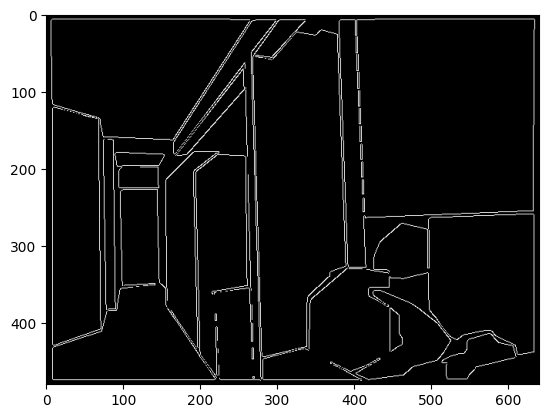

In [3]:
# Carregar a imagem
img = cv2.imread(path+'.png')
# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detectar as arestas
edges = cv2.Canny(img_gray, 100, 200)
# Mostrar as arestas
plt.imshow(edges, cmap="gray")


# edge detection

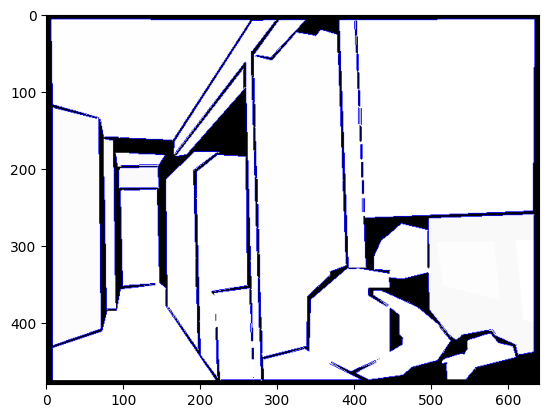

In [4]:

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

plt.show(plt.imshow(drawn_img))

In [5]:
lines

array([[[260.95337  , 350.6532   , 258.81107  , 185.63232  ]],

       [[419.1417   , 473.86246  , 463.114    , 468.04196  ]],

       [[226.875    , 474.3688   , 278.12598  , 474.41052  ]],

       [[259.06537  ,  96.88312  , 264.8968   , 319.39407  ]],

       [[280.625    , 474.37234  , 408.12527  , 474.40005  ]],

       [[146.91817  , 348.15305  , 144.1014   , 226.88135  ]],

       [[414.30203  , 263.83694  , 631.797    , 254.96266  ]],

       [[414.9249   , 326.96317  , 411.97958  , 261.81375  ]],

       [[632.07733  , 254.36784  , 633.76685  ,   6.8623157]],

       [[519.3878   , 453.12485  , 519.6168   , 471.8873   ]],

       [[576.9529   , 413.40057  , 548.03906  , 421.57095  ]],

       [[ 70.96719  , 406.88516  ,  67.93065  , 135.61319  ]],

       [[194.50925  , 204.37294  , 194.55937  , 238.12659  ]],

       [[385.1785   , 139.34554  , 392.10114  , 328.1167   ]],

       [[199.35524  , 399.37524  , 199.90382  , 441.90042  ]],

       [[140.63625  , 350.72183  ,  96.8

In [6]:
# desenhar os pontos de intersecção das arestas com a reta de varredura

lines = lines.reshape((-1,4))

lines.shape

(200, 4)

In [7]:
def plot_points_of_lines(lines):
    for line in lines:
        plt.plot(line[0], line[1], 'ro')
        plt.plot(line[2], line[3], 'ro',color='green')
    plt.show()

C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


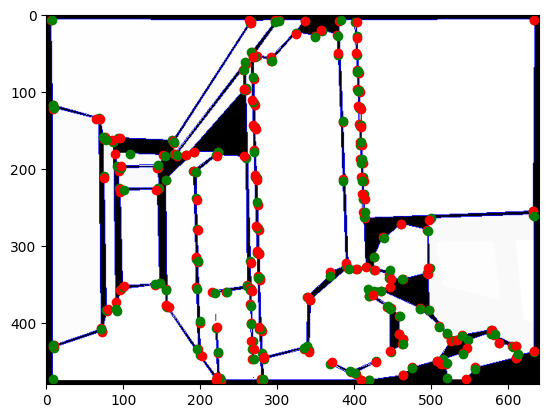

In [8]:
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


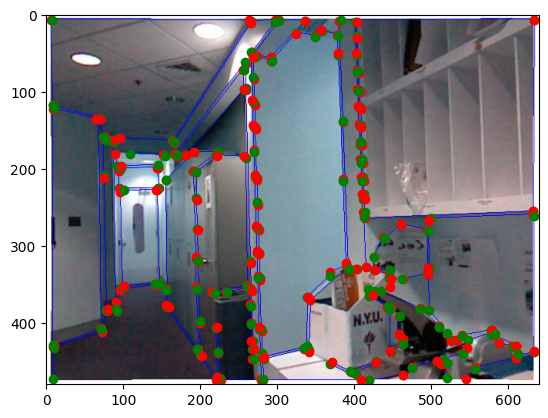

In [9]:
# read image from file with matplotlib

img_ori = plt.imread(path+'-color.png')

plt.imshow(img_ori)
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img_ori,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

# edge detection tunned

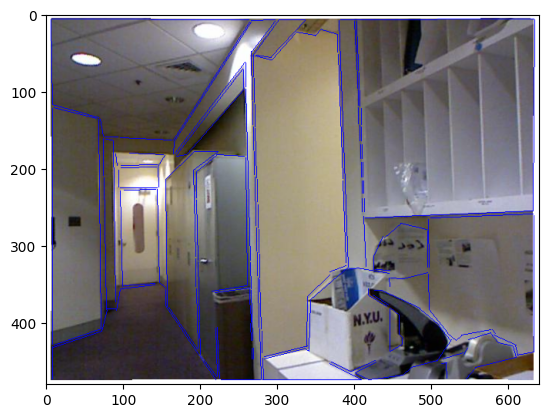

In [10]:
# Carregar a imagem
img_ori = cv2.imread(path+"-color.png")

img_gray_ori = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img_ori,lines)

plt.show(plt.imshow(drawn_img))

In [11]:
# # Import NumPy and PIL libraries
# import numpy as np

# def fft_upscaling(img_gray,scale=4):
#     # Perform FFT on the image
#     im_fft = np.fft.fft2(img_gray)

#     # Shift the zero-frequency component to the center of the spectrum
#     im_fft = np.fft.fftshift(im_fft)

#     # Create a new array with the desired output size and fill it with zeros
#     height, width = img_gray.shape
#     out = np.zeros((height * scale, width * scale), dtype=complex)

#     # Copy the shifted FFT array to the center of the new array
#     out[height * (scale - 1) // 2 : height * (scale + 1) // 2, width * (scale - 1) // 2 : width * (scale + 1) // 2] = im_fft

#     # Shift the zero-frequency component back to the corners of the spectrum
#     out = np.fft.ifftshift(out)

#     # Perform inverse FFT on the new array
#     out = np.fft.ifft2(out)

#     # Take the absolute value of the output array
#     out = np.abs(out)

#     # Normalize the output array to the range [0, 255]
#     out = out / out.max() * 255

#     return out

# img_big = fft_upscaling(img_gray,scale=4)

# # Plot the original and the scaled image

# plt.figure(figsize=(10, 5))
# plt.subplot(121)
# plt.axis('off')
# plt.title('Original')
# plt.imshow(img_gray, cmap='gray')
# plt.subplot(122)
# plt.axis('off')
# plt.title('Scaled')
# plt.imshow(img_big, cmap='gray')

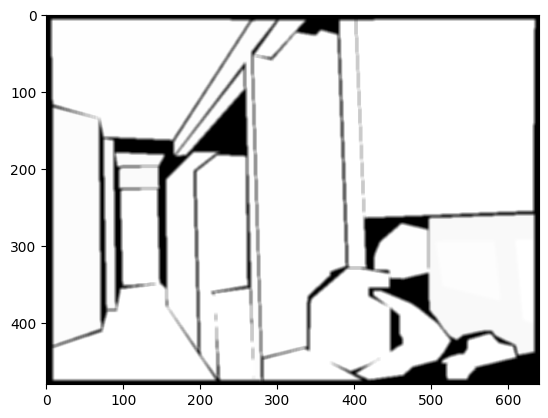

In [12]:
dst = cv2.GaussianBlur(img_gray, (5,5),cv2.BORDER_DEFAULT)

plt.imshow(dst, cmap='gray')

C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


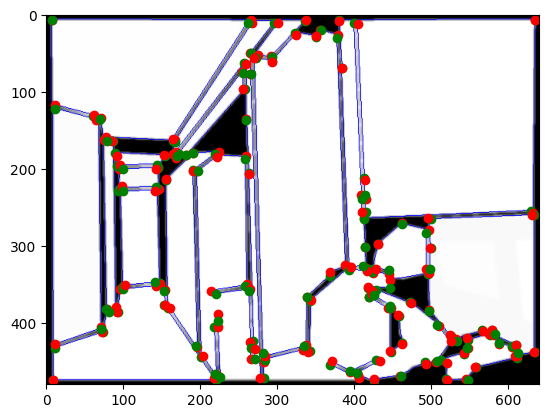

In [13]:
# plotar imagem e os pontos por cima

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(dst)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image
drawn_img = lsd.drawSegments(dst,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


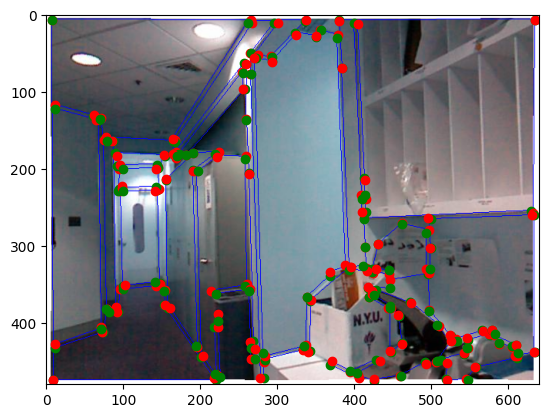

In [14]:
# read image from file with matplotlib

img_ori = plt.imread(path+'-color.png')

plt.imshow(img_ori)
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img_ori,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

In [15]:
lines.shape

(155, 4)

In [16]:
lines[:,2] - lines[:,0]

array([-3.86383057e+01,  7.57753754e+01, -5.15583191e+01,  1.31353760e+01,
        3.00584106e+01, -3.14198303e+01, -1.13398438e+01, -6.32901001e+00,
        1.07417603e+01,  3.25259094e+01, -3.54592285e+01,  1.99124756e+01,
        4.36957703e+01, -5.65820312e+00,  4.48690796e+00, -1.44080200e+01,
        3.07662354e+01, -3.19245300e+01, -6.40992737e+00,  2.81514893e+01,
        8.73469543e+00, -2.93079224e+01,  2.04635620e+01, -3.73352661e+01,
        3.42570801e+01, -4.51165161e+01, -2.75507202e+01, -7.29421997e+00,
        2.15319214e+01,  2.79639893e+01,  8.82304688e+01,  9.08172607e+00,
       -3.50243530e+01,  1.12976074e-01,  4.86954651e+01, -2.22909241e+01,
        5.47341309e+01,  3.34700623e+01, -5.10059357e+00,  1.65714931e+00,
        3.13236237e+00,  1.52289734e+01, -1.27398682e+00, -1.26162720e+00,
       -7.25513000e+01, -2.48293152e+01,  2.17395233e+02, -2.81883240e+00,
       -1.79360962e+00,  3.54697876e+01,  2.60833740e+00, -1.65839233e+01,
       -3.08414459e+00, -

In [17]:
# calculate norm of lines

vectors = np.zeros([lines.shape[0],2])

vectors[:,0] = lines[:,2] - lines[:,0]

vectors[:,1] = lines[:,1] - lines[:,3]

vectors[0:3]

array([[-38.63830566,  31.08514404],
       [ 75.77537537,  85.56332397],
       [-51.55831909, -43.82824707]])

In [18]:
norm = np.linalg.norm(vectors, axis=1)

norm[0:3]

array([ 49.59037048, 114.29343779,  67.6696055 ])

[]

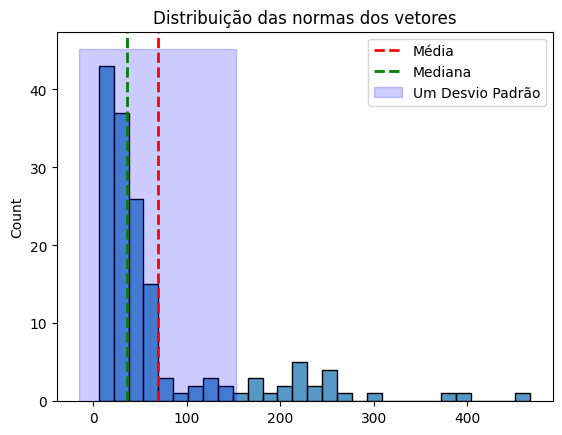

In [19]:
media = np.mean(norm)
mediana = np.median(norm)
desvio_padrao = np.std(norm)

# Plota o histograma
ax = sns.histplot(norm)

# Adiciona uma barra vertical para a média
ax.axvline(media, color='red', linestyle='dashed', linewidth=2,label="Média")

# Adiciona uma barra vertical para a mediana
ax.axvline(mediana, color='green', linestyle='dashed', linewidth=2,label="Mediana")

# Adiciona uma separação para o desvio padrão
ax.fill_between(x=[media-desvio_padrao, media+desvio_padrao], y1=0, y2=ax.get_ylim()[1], color='blue', alpha=0.2,label='Um Desvio Padrão')

# Adiciona um título ao gráfico
ax.set_title('Distribuição das normas dos vetores')

ax.legend()

plt.plot()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


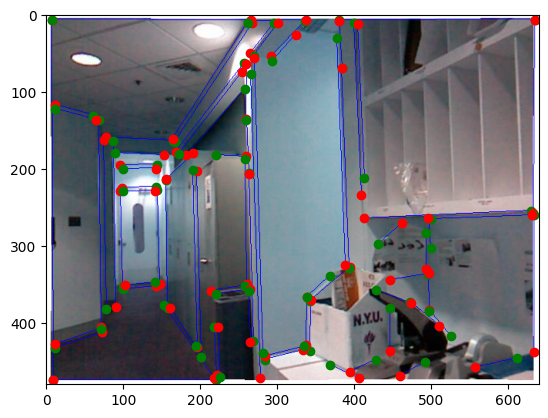

In [20]:
idx = np.where(norm > mediana)[0]

lines_fil = lines[idx,:]

# read image from file with matplotlib

img_ori = plt.imread(path+'-color.png')

plt.imshow(img_ori)
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img_ori,lines_fil)

plt.imshow(drawn_img)

plot_points_of_lines(lines_fil)


# Hough Transform

-1

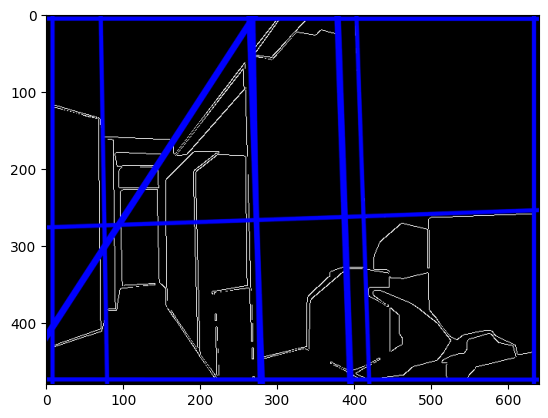

In [21]:
import cv2 as cv
import math
filename = path + '.png'
# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)



# cv.imshow("Source", src)
# cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
# cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

plt.imshow(cdst)

cv.waitKey()


-1

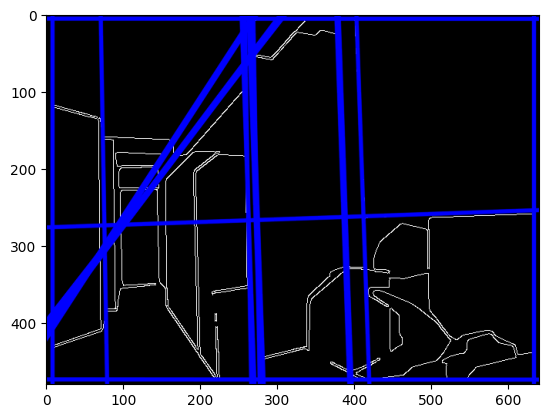

In [22]:
import cv2 as cv
import math
filename = path + '.png'
# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')

src = cv.GaussianBlur(src, (3,3),cv.BORDER_DEFAULT)

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)


lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)



# cv.imshow("Source", src)
# cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
# cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

plt.imshow(cdst)

cv.waitKey()


-1

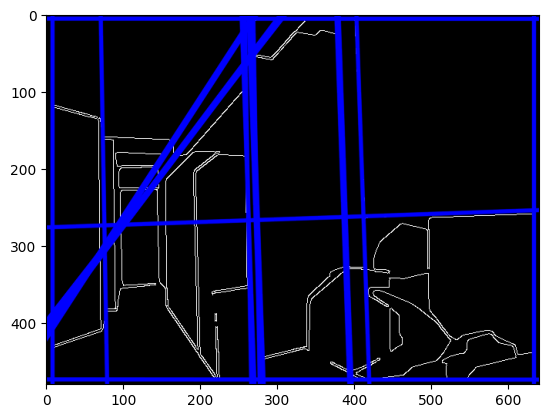

In [23]:
import cv2 as cv
import math
filename = path + '.png'
# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')

src = cv.GaussianBlur(src, (3,3),cv.BORDER_DEFAULT)

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# cv.imshow("Source", src)
# cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
# cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

plt.imshow(cdst)

cv.waitKey()


In [24]:
# img = cv2.imread(filename)

# img = cv.imread(cv.samples.findFile(filename))

# # Converter para escala de cinza

# # swap black and white

# # blur 
# img = cv2.GaussianBlur(img, (3,3),cv2.BORDER_DEFAULT)

# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if img_gray2[i][j] <= 255/2:
#             img_gray2[i][j] = 255
#         else:
#             img_gray2[i][j] = 0


# img_gray2 = img_gray2.astype(np.uint8)

# img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# # Copy edges to the images that will display the results in BGR

# lines = cv.HoughLines(img_gray2, 1, np.pi / 180, 150, None, 0, 0)

# if lines is not None:
#     for i in range(0, len(lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         a = math.cos(theta)
#         b = math.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#         cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# plt.imshow(lines)

# Probabilistic Hough Transform

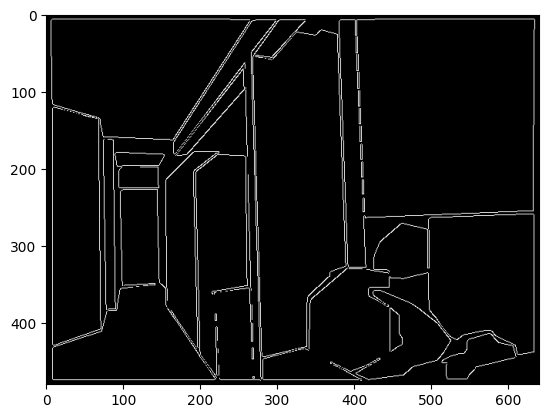

In [25]:
# Carregar a imagem
img = cv2.imread(path+'.png')
# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detectar as arestas
dst = cv2.GaussianBlur(img_gray, (5,5),cv2.BORDER_DEFAULT)

plt.imshow(dst, cmap='gray')
edges = cv2.Canny(img_gray, 100, 200)
# Mostrar as arestas
plt.imshow(edges, cmap="gray")

In [26]:

#Probabilistic Hough Transform (PHT) with OpenCV

# lines = cv2.HoughLines(img_gray, rho=1, theta=np.pi/180, threshold=100)

lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

In [27]:
lines.shape

(20, 1, 4)

C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


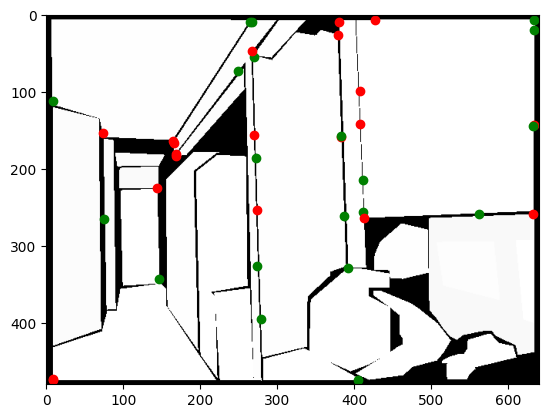

In [28]:
lines = lines.reshape((-1,4))

plt.imshow(img)
plot_points_of_lines(lines)

In [29]:
# import cv2
# import numpy as np

# img = cv2.imread(path+'.png')

# # Apply Gaussian filter
# blur = cv2.GaussianBlur(img, (5, 5), 0)

# # Apply Sobel operator
# sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
# sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

# # Calculate gradient direction and magnitude
# grad_direction = np.arctan2(sobely, sobelx)
# grad_magnitude = np.sqrt(np.square(sobely) + np.square(sobelx))

# # Non-maximum suppression
# height, width = img.shape
# suppressed = np.zeros((height, width))
# for i in range(1, height - 1):
#     for j in range(1, width - 1):
#         angle = grad_direction[i, j] * 180 / np.pi
#         if angle < 0:
#             angle += 180
#         q = np.round(angle / 45)
#         p1 = grad_magnitude[i-1, j-q]
#         p2 = grad_magnitude[i, j]
#         p3 = grad_magnitude[i+1, j+q]
#         if p2 >= p1 and p2 >= p3:
#             suppressed[i, j] = p2

# # Hysteresis thresholding
# low_threshold = 0.1 * np.max(suppressed)
# high_threshold = 0.3 * np.max(suppressed)

# strong_edges = (suppressed > high_threshold)
# weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

# edges = np.zeros((height, width))
# for i in range(1, height - 1):
#     for j in range(1, width - 1):
#         if strong_edges[i, j]:
#             edges[i, j] = 255
#         elif weak_edges[i, j]:
#             if (strong_edges[i-1:i+2, j-1:j+2]).any():
#                 edges[i, j] = 255

In [30]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(path+'.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Calculate the Laplacian gradient
laplacian = cv2.Laplacian(blur, cv2.CV_64F)

# Threshold the gradient to obtain the edges
edges = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY)[1]

# Display the result
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Upscaling IA

In [31]:
from super_image import EdsrModel, ImageLoader,A2nModel

from PIL import Image

In [32]:
image = Image.open(path + '.png')

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\super_image\data\loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.as_tensor([lr])


In [33]:
# from PIL import Image
# import requests

# model = A2nModel.from_pretrained('eugenesiow/a2n', scale=2)      # scale 2, 3 and 4 models available
# inputs = ImageLoader.load_image(image)
# preds = model(inputs)

# ImageLoader.save_image(preds, './scaled_2x.png')                        # save the output 2x scaled image to `./scaled_2x.png`
# ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')      # save an output comparing the super-image with a bicubic scaling


C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


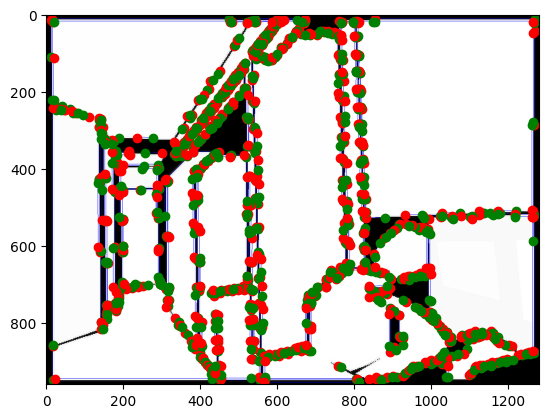

In [34]:
img = cv2.imread('./scaled_2x.png')
# Converter para escala de cinza
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray2)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img_gray2,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

In [35]:
def convert_instances_to_rgb(instances):
    rgb_instances = np.zeros((instances.shape[0], instances.shape[1], 3))
    for i in range(instances.shape[0]):
        for j in range(instances.shape[1]):
            if instances[i][j] == 0:
                rgb_instances[i][j] = 0
            else:
                rgb_instances[i][j] = 255
    rgb_instances = 255*rgb_instances/np.max(rgb_instances)
    return rgb_instances.astype(np.uint8)

instance = convert_instances_to_rgb(img_gray)

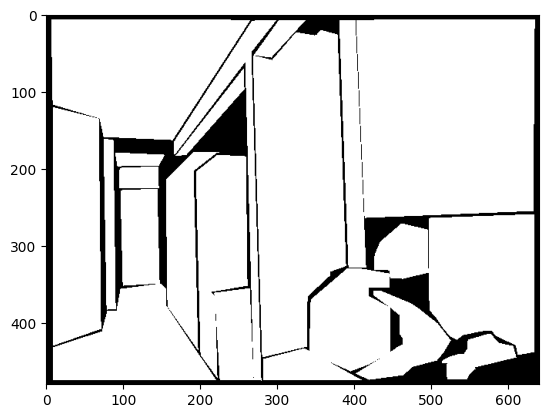

In [36]:
plt.imshow(instance)

In [37]:
img_gray2 = cv2.cvtColor(instance, cv2.COLOR_BGR2GRAY)

C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


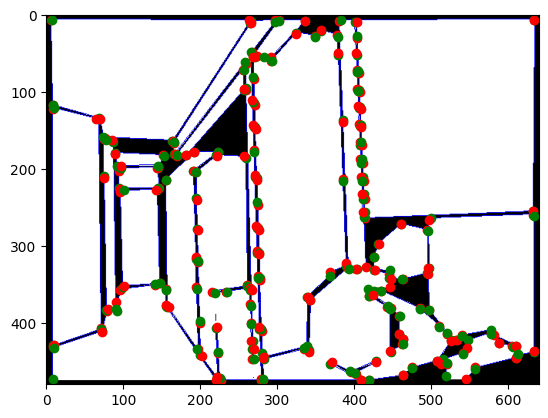

In [38]:
#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray2)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img_gray2,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


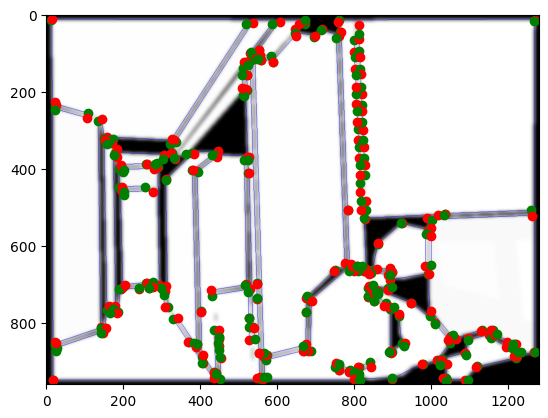

In [48]:
# apply blur

img_gray2 = cv2.GaussianBlur(img_gray2, (9,9),cv2.BORDER_DEFAULT)

#Create default parametrization LSD

lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image

lines = lsd.detect(img_gray2)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image

drawn_img = lsd.drawSegments(img_gray2,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

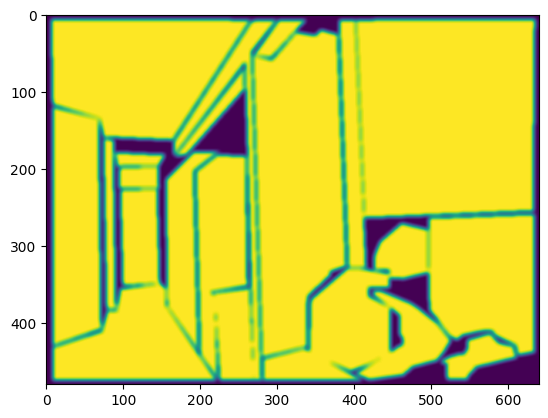

In [40]:
dst = cv2.GaussianBlur(img_gray2, (7,7),cv2.BORDER_DEFAULT)

plt.imshow(dst)

In [43]:
# plotar imagem e os pontos por cima


#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(dst)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

drawn_img = lsd.drawSegments(img,lines)

In [44]:
dst = cv2.GaussianBlur(img_gray, (7,7),cv2.BORDER_DEFAULT)
cv2.imwrite("img_blur.png", dst)

True

In [45]:
image = Image.open('img_blur.png')

model = A2nModel.from_pretrained('eugenesiow/a2n', scale=2)      # scale 2, 3 and 4 models available
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x_blur.png')                        # save the output 2x scaled image to `./scaled_2x.png`
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare_blur.png')      # save an output comparing the super-image with a bicubic scaling


https://huggingface.co/eugenesiow/a2n/resolve/main/pytorch_model_2x.pt


C:\Users\emanu\AppData\Local\Temp\ipykernel_8596\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


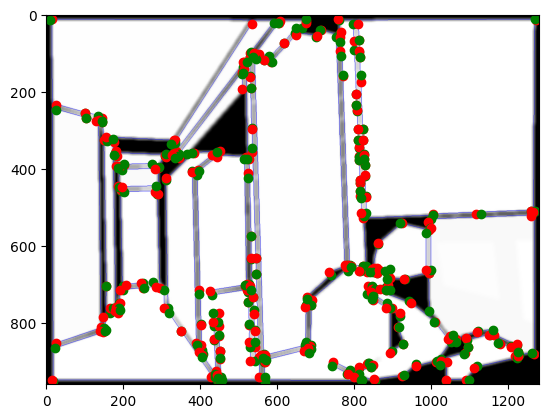

In [46]:
img = cv2.imread('./scaled_2x_blur.png')

# Converter para escala de cinza

img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Create default parametrization LSD

lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image

lines = lsd.detect(img_gray2)[0] #Position 0 of the returned tuple are the detected lines

lines = lines.reshape((-1,4))

#Draw detected lines in the image

drawn_img = lsd.drawSegments(img_gray2,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)